In [1]:
#Marine debris training  on Nasa noaa  & unsplash & other randome free images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report
from tensorflow.keras import preprocessing
from keras.layers import Input, Conv2DTranspose
from tensorflow.keras import utils
import matplotlib.pyplot as plot
import tensorflow as tf
import numpy as np
import pandas as pd
import PIL as image
import PIL
import datetime
import zipfile
import pathlib
import time
import os

In [2]:
ECOBOT_Dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ECOBOT dataset/Training')
image_count = len(list(ECOBOT_Dir.glob('*/*.jpg')))
print(image_count)

548


In [3]:
#loading images
batch_size = 32
img_h = 256
img_w = 256
train_ds = tf.keras.preprocessing.image_dataset_from_directory(ECOBOT_Dir,validation_split=0.2
                                                              ,subset="training",seed=123,
                                                             batch_size = batch_size, image_size=(img_h,img_w))

Found 741 files belonging to 19 classes.
Using 593 files for training.


In [4]:
batch_size = 32
img_h =256
img_w = 256
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(ECOBOT_Dir,validation_split=0.2
                                                              ,subset="validation",seed=123,
                                                             batch_size = batch_size, image_size=(img_h,img_w))

Found 741 files belonging to 19 classes.
Using 148 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Big objets', 'Cloths', 'Diaster debris', 'Mass of plastic debris', 'Microplastic', 'Plastic and glass bottles', 'Wood', 'cans', 'cigarits', 'coral reef debris', 'fishhing net', 'glass', 'metal', 'paper', 'plastic', 'surface environmental debris', 'susbebded object', 'undefined objects', 'victims of debris']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


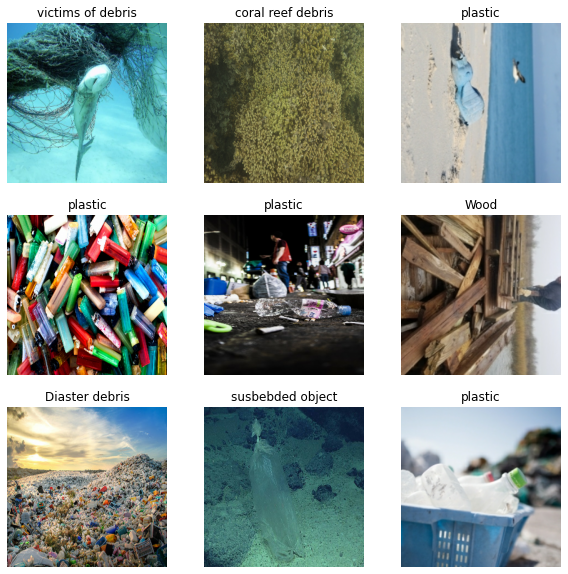

In [8]:
plot.figure(figsize=(10, 10))
for images, labels in train_ds.take(10):
    for i in range(9):
        ax = plot.subplot(3, 3, i + 1)
        plot.imshow(images[i].numpy().astype("uint8"))
        plot.title(class_names[labels[i]])
        plot.axis("off")

In [9]:
#normalizing images
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

#Aututuning data 
ds_autotune = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=ds_autotune)
validation_ds = validation_ds.cache().prefetch(buffer_size=ds_autotune)

In [10]:
#creating CNN model
#sequential model
ECOBOT_model = tf.keras.models.Sequential()
#cnn creating concolution layers
#1st layer dense
ECOBOT_model.add(tf.keras.layers.Dense(units = 128,activation='relu',input_shape=(256,256,3)))
ECOBOT_model.add(tf.keras.layers.Dropout(0.2))
#2nd layer convolutional layer
ECOBOT_model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding="same", activation ='sigmoid'))
#3rd layer pool
ECOBOT_model.add(tf.keras.layers.MaxPool2D(pool_size =2,strides=2,padding='valid'))
#4th& 5th layers are convolution layer
ECOBOT_model.add(tf.keras.layers.Conv2D(filters = 64,activation='sigmoid',kernel_size=3,padding="same"))
ECOBOT_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation='relu'))
#6th layer is max pool
ECOBOT_model.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='valid',strides=2))
#7th layer
ECOBOT_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation='relu'))
#

#output layer softmax
ECOBOT_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
ECOBOT_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'])
ECOBOT_model.add(tf.keras.layers.Flatten())

ECOBOT_model.summary()
def elapsed_time(seconds):
    return str(datetime.timedelta(seconds = t))
t = time.time()
print(elapsed_time(t))
ECOBOT_model.fit(train_ds,validation_data = validation_ds,epochs=5)
def elapsed_time(seconds):
    return str(datetime.timedelta(seconds = t))
t = time.time()
print(elapsed_time(t))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256, 256, 128)     512       
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 128)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [11]:
ECOBOT_model.evaluate(validation_ds)

5/5 [==============================] - 1s 227ms/step - loss: 9.9925 - sparse_categorical_accuracy: 0.0270


[9.992483139038086, 0.027027027681469917]